# **Zomato data analysis project**

pandas: A data manipulation library offering structures like DataFrames for easy handling of structured data.
numpy: A library for numerical computations using arrays and matrices.
matplotlib: A plotting library for generating static and interactive visualizations.
seaborn: A high-level data visualization library built on top of matplotlib for creating informative and attractive plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**setp-2: create data frame**

In [4]:
dataframe = pd.read_csv('Zomato data .csv')
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [5]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


 **Converting Data Type of Rate Column and Removing Denominator (Data Ceiling)**


In [7]:
# Function to handle the conversion and removal of denominator
def handleRate(value):
    value = str(value).split('/')
    value = value[0]  # Taking only the numerator (before '/')
    return float(value)

# Applying the handleRate function to the 'rate' column
dataframe['rate'] = dataframe['rate'].apply(handleRate)

# Printing the updated DataFrame
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#there is no null values

# no null values

#**Type of resturent majority of people order food**

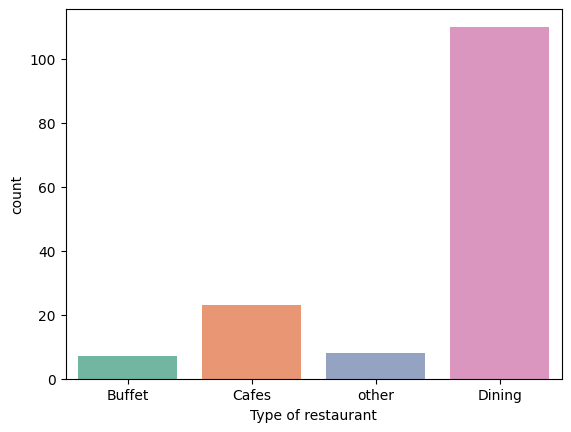

In [16]:
sns.countplot(x=dataframe['listed_in(type)'], hue=dataframe['listed_in(type)'], palette='Set2', legend=False)
plt.xlabel("Type of restaurant")
plt.show()

# Conclusion:
# The majority of the restaurants fall into the dining category.
# Dining restaurants are preferred by a larger number of individuals.

# which type of resturent getttes max vote

In [17]:
# Count the occurrences of each restaurant type
restaurant_counts = dataframe['listed_in(type)'].value_counts()

# Get the type of restaurant with the maximum votes
max_votes = restaurant_counts.idxmax()
max_votes_count = restaurant_counts.max()

print(f"The type of restaurant that gets the maximum votes is: {max_votes} with {max_votes_count} votes.")


The type of restaurant that gets the maximum votes is: Dining with 110 votes.


In [18]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

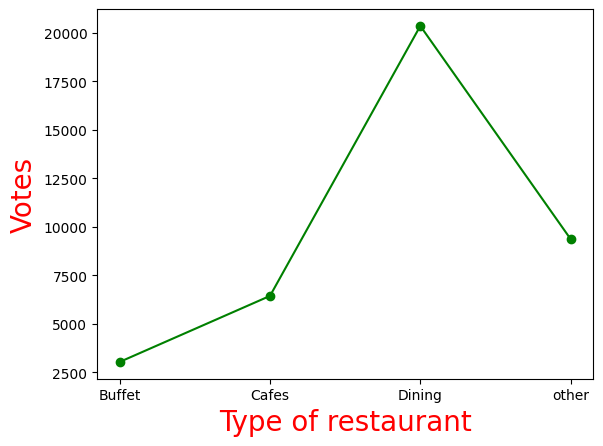

In [19]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

In [20]:
# Conclusion: Dining-type restaurants received the highest number of votes, followed by cafes, while buffets and other types were less popular.

# find majority of restaurant ratings:

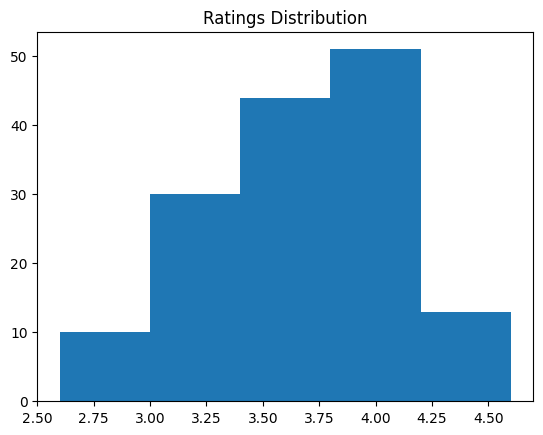

In [21]:
plt.hist(dataframe['rate'], bins=5)
plt.title("Ratings Distribution")
plt.show()

# Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.
# This shows that most restaurants are rated above average, indicating generally good customer experiences.

In [22]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Average Order Spending by Couples

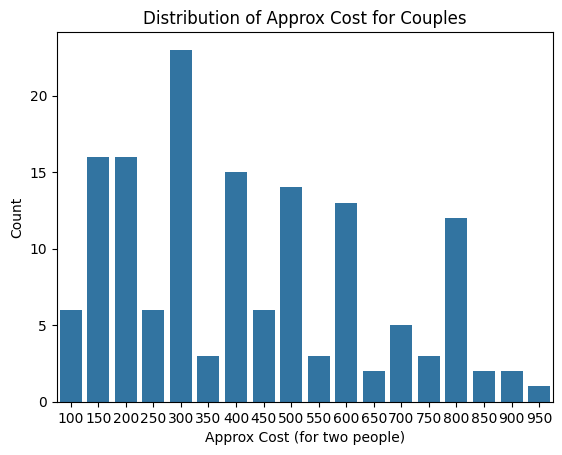

In [23]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Count')
plt.title('Distribution of Approx Cost for Couples')
plt.show()


# Conclusion: The majority of couples prefer restaurants with an approximate cost of around 300 rupees.

In [24]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Which Mode Receives Higher Ratings: Online or Offline?

<Axes: xlabel='online_order', ylabel='rate'>

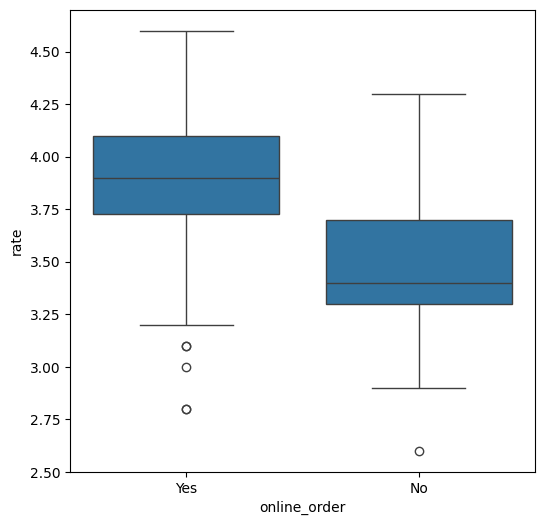

In [25]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

# which type of restaurant receive more online orders


# CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

In [1]:
dataframe.head()

NameError: name 'dataframe' is not defined

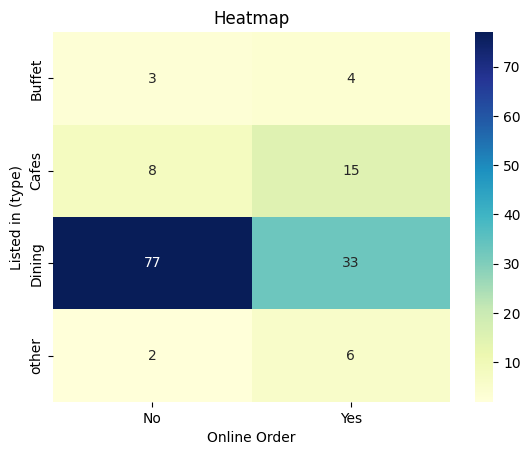

In [29]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (type)")
plt.show()

# CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person atrestaurants, but prefer online ordering at cafes.

In [43]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


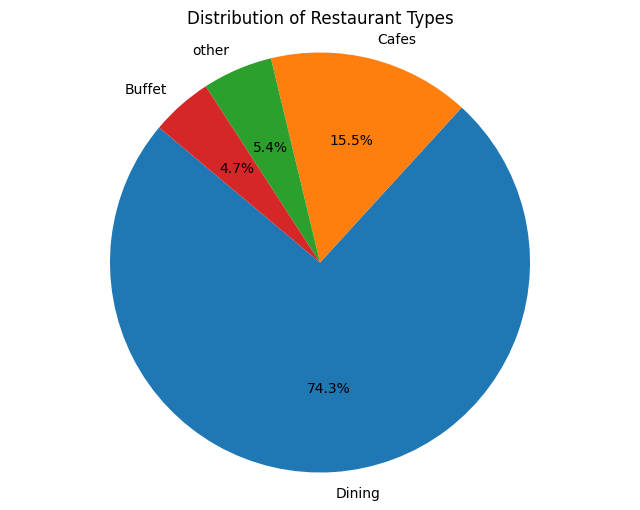

In [42]:
restaurant_counts = dataframe['listed_in(type)'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(restaurant_counts, labels=restaurant_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Restaurant Types")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Conclusion: The pie chart shows the distribution of restaurant types, highlighting which categories are most popular. This visualization helps identify consumer preferences, aiding in informed business decisions.